In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
main_dir = "/u/kaimibk/Documents/Research/NAC/"
data_dir = main_dir+"data/"
out_dir = main_dir+"output/"
fig_dir = out_dir+"figs/"

In [3]:
df = pd.read_csv(data_dir+"Pleiades_master.csv", index_col=0)
df.head(2)

,Name,RA,Dec,K2MASS,(V-K)o,Period,Ref,BCK,logL/Lo,M/Mo,...,k2_vmag,k2_e_vmag,k2_teff,k2_e_teff,band,Index,iso_rad_K2,iso_rad_err_K2,iso_teff_K2,iso_teff_err_K2
0,J03394633+2358531,54.943067,23.981442,11.83,4.89,1.138,1.0,2.73,-1.66,0.41,...,NaN,NaN,3959.0,348.0,kmag,0,0.419426,0.013360,4222.314643,100.0
1,J03414664+2301198,55.444367,23.022186,13.16,5.63,0.294,1.0,2.81,-2.23,0.19,...,NaN,NaN,3514.0,144.0,kmag,1,0.268599,0.009612,3951.132391,100.0


## Data Collection

### Rotation Period

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys


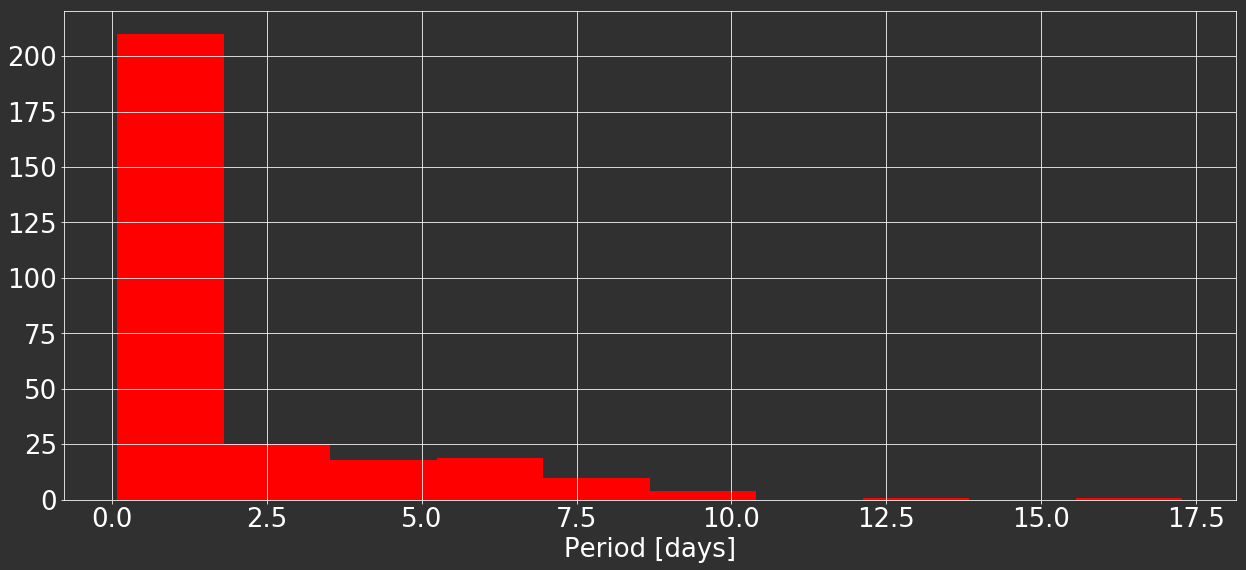

In [13]:
plt.style.use('dark_background')
fig=plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()
colormap = plt.get_cmap('autumn')
ax.set_color_cycle([colormap(k) for k in range(len(df))])

plt.hist(df.Period)
    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

ax.set_facecolor("#303030")

ax.set_xlabel("Period [days]")
plt.savefig(fig_dir+"period_hist.png", bbox_inches="tight", dpi=150, 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

### Radius

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go
from Scripts.plotly_save import save_fig

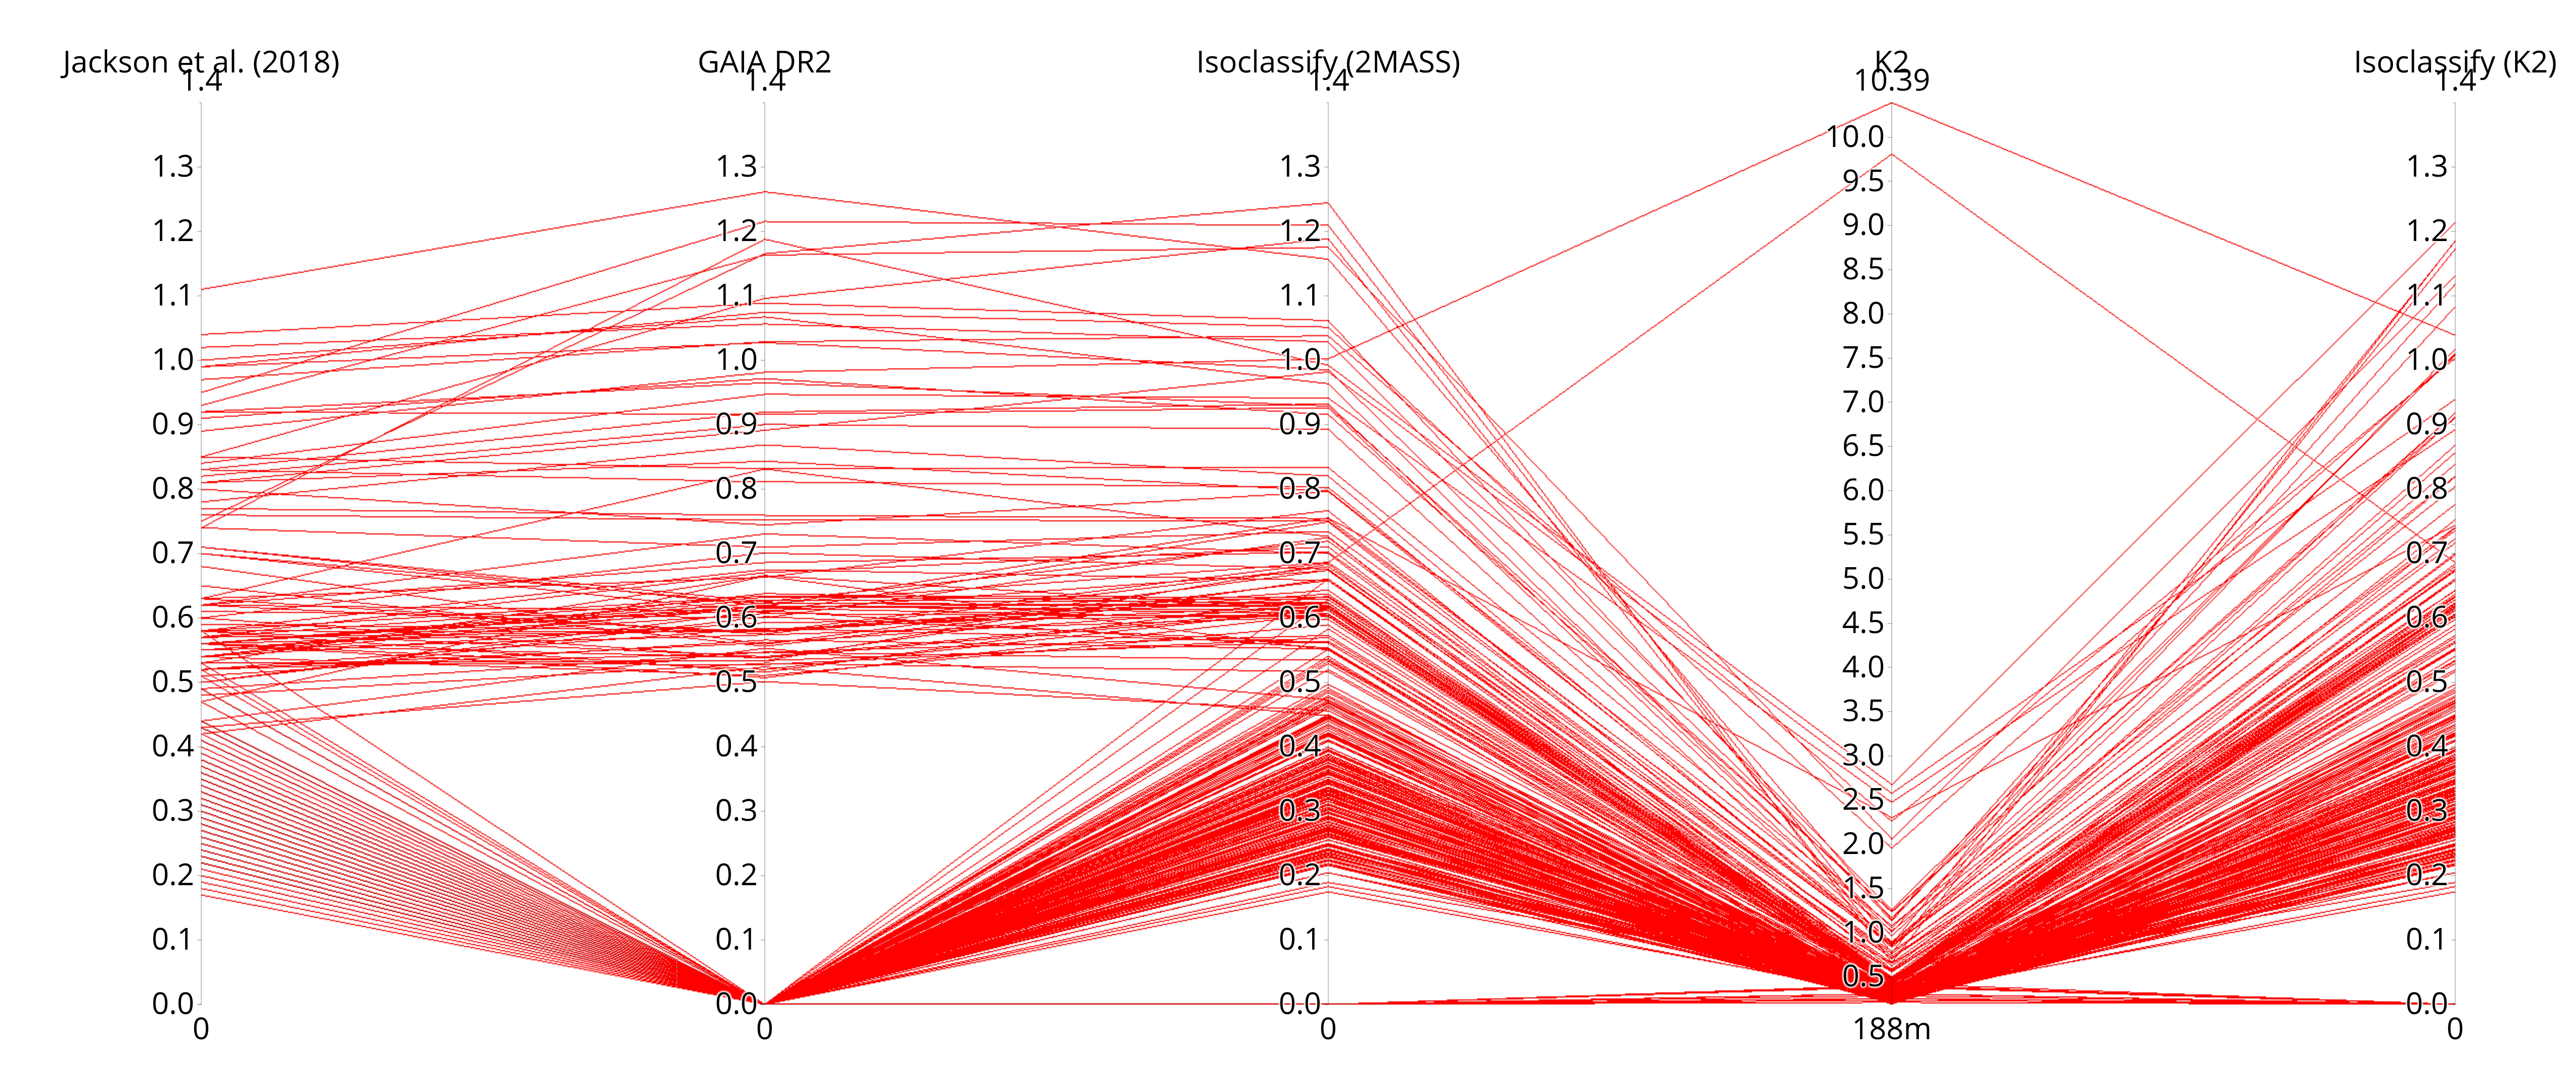

In [54]:
par_radii = go.Parcoords(
            line = {'color' : 'red'},
            labelfont = {"color" : "black", "size" : 30},
            tickfont = {"color" : "black", "size" : 30},
            rangefont = {"color" : "black", "size" : 30},
            dimensions = list([      
                dict(
                    range = [0,1.4],
                    label = 'Jackson et al. (2018)', 
                    values = df["R/Ro"]
                    ),
                dict(
                    range = [0,1.4],
                    label = "GAIA DR2",
                    values = df.radius_val
                    ),  
                dict(
                    range = [0,1.4],
                    label = "Isoclassify (2MASS)",
                    values = df.iso_rad
                    ), 
                dict(
                    #range = [0,1.4],
                    label = "K2",
                    values = df.K2_rad
                    ), 
                dict(
                    range = [0,1.4],
                    label = "Isoclassify (K2)",
                    values = df.iso_rad_K2
                    ),  
                 
        ])
    )

layout = go.Layout(
        margin = {"l" : 200, "r": 120},
        width = 2560,
        height = 1080,
        font = {"size" : 30},
        plot_bgcolor = "#EEEEEE",
        #paper_bgcolor = "#EEEEEE",
                  )

figure = go.Figure(data=[par_radii], layout=layout)

save_fig(figure, 'radius_parcoords_k2', fig_dir, dynamic=False, scale=2)

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.



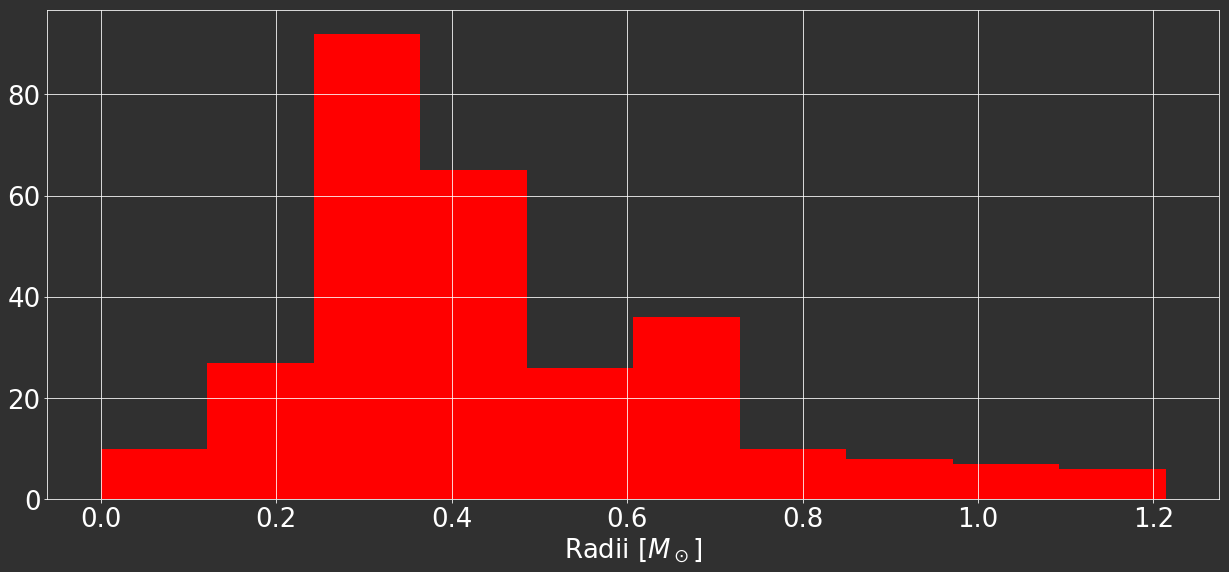

In [60]:
plt.style.use('dark_background')
fig=plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()
colormap = plt.get_cmap('autumn')
ax.set_color_cycle([colormap(k) for k in range(len(df))])

plt.hist(df.iso_rad_K2.dropna())
    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

ax.set_facecolor("#303030")

ax.set_xlabel("Radii [$M_\odot$]")
plt.savefig(fig_dir+"radii_hist.png", bbox_inches="tight", dpi=150, 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

### Histogram VSINI

/u/kaimibk/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.



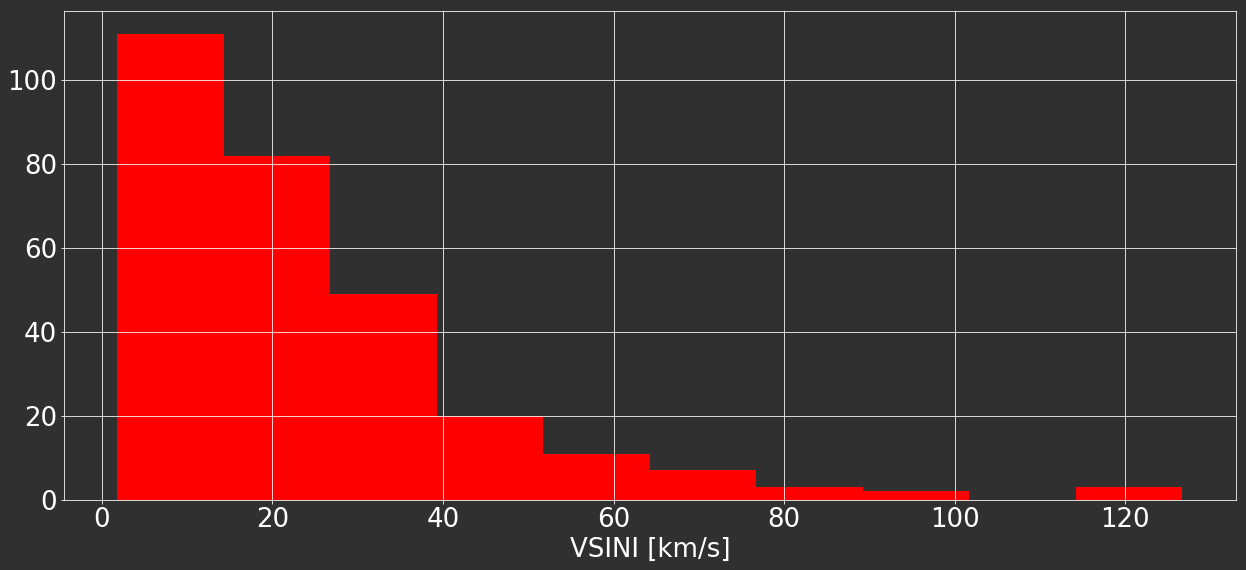

In [55]:
plt.style.use('dark_background')
fig=plt.figure(figsize=(21,9))
fig.patch.set_facecolor('#303030')
plt.grid()
ax = plt.gca()
colormap = plt.get_cmap('autumn')
ax.set_color_cycle([colormap(k) for k in range(len(df))])

plt.hist(df.VSINI)
    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(26)

ax.set_facecolor("#303030")

ax.set_xlabel("VSINI [km/s]")
plt.savefig(fig_dir+"VSINI_hist.png", bbox_inches="tight", dpi=150, 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()